In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import f_classif
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
base_dir = "F:\Resources & Codes\Lab Dataset\Bangladeshi Crops Dataset\BangladeshiCrops\Crop___Disease\Potato"
image_size = 224
batch_size = 32

In [3]:
feature_extraction_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [4]:
all_images = []
all_labels = []

for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = keras.preprocessing.image.load_img(img_path, target_size=(image_size, image_size))
            img_array = keras.preprocessing.image.img_to_array(img)
            all_images.append(img_array)
            all_labels.append(class_folder)


In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(all_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [7]:
X_train = np.reshape(X_train, (-1, image_size, image_size, 3))

In [8]:
train_data = feature_extraction_datagen.flow(
    X_train, keras.utils.to_categorical(y_train), batch_size=batch_size, shuffle=False
)

In [9]:
X_test = np.reshape(X_test, (-1, image_size, image_size, 3))

In [10]:
test_data = feature_extraction_datagen.flow(
    X_test, keras.utils.to_categorical(y_test), batch_size=batch_size, shuffle=False
)

In [11]:
print(X_train)
print(X_test)

[[[[179. 177. 191.]
   [215. 213. 227.]
   [167. 165. 179.]
   ...
   [151. 149. 160.]
   [139. 137. 148.]
   [137. 135. 146.]]

  [[151. 149. 163.]
   [179. 177. 191.]
   [164. 162. 176.]
   ...
   [147. 145. 156.]
   [145. 143. 154.]
   [149. 147. 158.]]

  [[174. 172. 186.]
   [194. 192. 206.]
   [174. 172. 186.]
   ...
   [149. 147. 158.]
   [147. 145. 156.]
   [151. 149. 160.]]

  ...

  [[199. 196. 203.]
   [199. 196. 203.]
   [192. 189. 196.]
   ...
   [164. 161. 168.]
   [154. 151. 158.]
   [148. 145. 152.]]

  [[197. 194. 201.]
   [199. 196. 203.]
   [193. 190. 197.]
   ...
   [146. 143. 150.]
   [138. 135. 142.]
   [136. 133. 140.]]

  [[188. 185. 192.]
   [194. 191. 198.]
   [194. 191. 198.]
   ...
   [151. 148. 155.]
   [152. 149. 156.]
   [157. 154. 161.]]]


 [[[167. 165. 179.]
   [169. 167. 181.]
   [169. 167. 181.]
   ...
   [190. 188. 201.]
   [192. 190. 203.]
   [195. 193. 206.]]

  [[172. 170. 184.]
   [173. 171. 185.]
   [171. 169. 183.]
   ...
   [198. 196. 209.]
 

In [12]:
print(y_train)
print(y_test)

[0 0 2 ... 1 0 0]
[2 0 2 0 2 0 0 0 0 0 1 2 0 1 2 2 2 1 0 2 2 1 0 2 0 0 0 2 0 0 2 0 2 0 2 2 0
 0 0 2 0 0 0 2 0 0 2 0 1 0 0 2 2 2 0 0 2 2 2 0 2 2 2 1 0 2 0 2 2 0 0 0 0 2
 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 2 1 2 2 1 2 2 2 1 2 2 0 0 2 2 0 1 2 1 0
 1 0 2 2 2 0 2 0 2 2 2 2 0 2 0 0 2 2 0 2 0 2 2 2 2 0 0 0 2 0 2 2 0 2 0 2 0
 0 2 2 0 0 2 2 2 2 0 1 2 2 0 2 2 0 0 2 0 0 0 2 2 2 2 2 2 2 0 0 1 2 1 2 0 2
 0 2 0 2 0 0 0 2 0 0 0 0 2 0 2 2 2 2 2 0 1 2 0 2 0 1 2 2 2 0 0 0 2 2 2 0 2
 0 2 2 2 2 0 0 2 0 2 0 0 0 2 0 2 1 2 2 2 0 0 0 2 2 0 0 1 2 2 0 2 0 0 2 0 2
 0 0 2 2 0 2 2 1 2 0 0 0 2 0 2 2 2 0 0 0 2 2 2 2 1 0 0 2 0 2 2 0 0 2 0 2 0
 2 2 0 0 0 0 0 2 2 2 0 2 2 0 0 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 2 0 2 0 0 2 2
 0 2 0 0 2 2 2 0 0 0 0 0 2 2 2 1 2 0 2 0 0 0 0 1 1 2 1 0 1 0 0 2 0 2 0 0 1
 0 2 0 0 2 2 2 0 0 2 2 2 2 0 0 0 0 0 1 0 0 0 0 2 2 0 2 0 2 2 2 2 0 0 2 0 2
 0 0 2 2 0 2 0 2 0 2 0 0 2 0 0 0 1 0 0 1 2 1 0 0]


In [13]:
# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data):
    base_model = model(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_test_features.append(extract_features(model, X_test))

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_test_features_std = scaler.fit_transform(X_test_features)


1/1 [==============================] - 0s 40ms/step


In [14]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')
X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)  # Use transform instead of fit_transform

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)

Selected Features Indices: [   0    1    2 ... 5373 5374 5375]


d:\Python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   0    3   26   39   44   60   62   65   66   73   74  101  102  104
  115  119  124  125  138  150  151  157  164  199  204  216  223  243
  244  250  254  264  269  272  274  281  315  328  336  339  342  352
  353  357  360  365  371  372  387  389  399  401  402  409  414  423
  430  438  439  441  451  454  464  468  472  473  475  485  513  516
  517  523  528  536  552  558  562  575  578  582  591  599  602  608
  609  616  626  628  633  637  646  655  656  663  674  682  703  708
  721  728  733  734  738  753  755  759  769  775  776  781  787  791
  793  794  813  829  833  851  855  866  878  893  908  920  921  924
  935  941  946  949  956  964  965  968  969  992  998  999 1003 1005
 1013 1023 1025 1026 1031 1049 1056 1060 1062 1064 1082 1083 1093 1101
 1103 1110 1129 1132 1135 1138 1141 1153 1155 1160 1177 1184 1201 1215
 1233 1234 1235 1247 1248 1258 1287 1289 1


Support Vector Machine (SVM)

In [15]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_selected, y_train)

# Predict on test set
svm_pred = svm_classifier.predict(X_test_selected)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Classifier Accuracy:", svm_accuracy * 100)

SVM Classifier Accuracy: 99.30394431554525


Precision, Recall, and F1 score for SVM

In [16]:
svm_predictions = svm_classifier.predict(X_test_selected)

svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)


SVM Precision: 0.9929851900589859
SVM Recall: 0.9930394431554525
SVM F1 Score: 0.9929910684093843


Logistic Regression

In [17]:
logreg = LogisticRegression(random_state=42,max_iter=1000)

history = logreg.fit(X_train_selected, y_train)

# Save the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.joblib')

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.joblib')

# Predict on the test set using the loaded model
predictions = loaded_model.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Test Accuracy:", accuracy * 100)

Logistic Regression Test Accuracy: 99.30394431554525


Precision, Recall, and F1 score for Logistic Regression

In [18]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9929851900589859
Recall: 0.9930394431554525
F1 Score: 0.9929910684093843


DNN

In [19]:
# One-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Define the DNN model
def build_dnn_model(input_dim, num_of_classes):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_of_classes, activation='softmax')  # Use 'softmax' for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Check the number of features after ANOVA feature selection
num_selected_features = len(selected_features_indices)

# Build the DNN model
dnn_model = build_dnn_model(num_selected_features, 3)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('model_checkpoint.h5', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

# Train the DNN model with one-hot encoded labels
history = dnn_model.fit(X_train_selected, y_train_one_hot,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_test_selected, y_test_one_hot), callbacks=[checkpoint])

Epoch 1/100
48/54 [=========================>....] - ETA: 0s - loss: 0.3040 - accuracy: 0.9056
Epoch 1: val_accuracy improved from -inf to 0.97680, saving model to model_checkpoint.h5
54/54 [==============================] - 3s 19ms/step - loss: 0.3168 - accuracy: 0.9088 - val_loss: 0.1737 - val_accuracy: 0.9768
Epoch 2/100
50/54 [==========================>...] - ETA: 0s - loss: 0.1560 - accuracy: 0.9750
Epoch 2: val_accuracy improved from 0.97680 to 0.99304, saving model to model_checkpoint.h5
54/54 [==============================] - 1s 10ms/step - loss: 0.1484 - accuracy: 0.9750 - val_loss: 0.0317 - val_accuracy: 0.9930
Epoch 3/100
50/54 [==========================>...] - ETA: 0s - loss: 0.0699 - accuracy: 0.9881
Epoch 3: val_accuracy did not improve from 0.99304
54/54 [==============================] - 0s 7ms/step - loss: 0.0704 - accuracy: 0.9872 - val_loss: 0.0484 - val_accuracy: 0.9907
Epoch 4/100
54/54 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9843

Precision, Recall, and F1 score for DNN

In [20]:
# Predict on the test set using the DNN model
dnn_predictions = dnn_model.predict(X_test_selected)
dnn_predictions = np.argmax(dnn_predictions, axis=1)  # Convert one-hot encoded predictions to class labels

dnn_precision = precision_score(y_test, dnn_predictions, average='weighted')
dnn_recall = recall_score(y_test, dnn_predictions, average='weighted')
dnn_f1 = f1_score(y_test, dnn_predictions, average='weighted')

print("DNN Precision:", dnn_precision)
print("DNN Recall:", dnn_recall)
print("DNN F1 Score:", dnn_f1)


14/14 [==============================] - 0s 2ms/step
DNN Precision: 0.9977523201856149
DNN Recall: 0.9976798143851509
DNN F1 Score: 0.9976953210559267


Plot training and validation accuracy

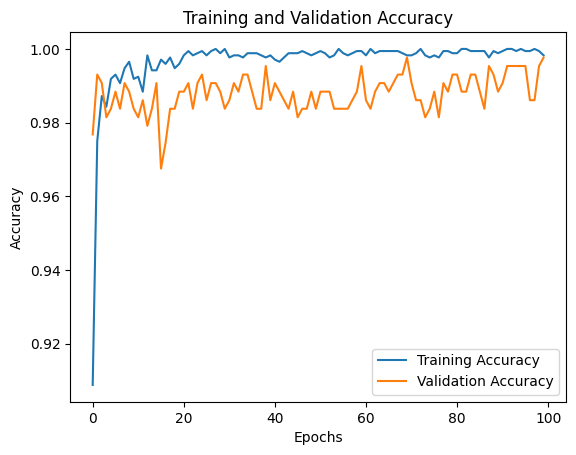

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plot training and validation loss

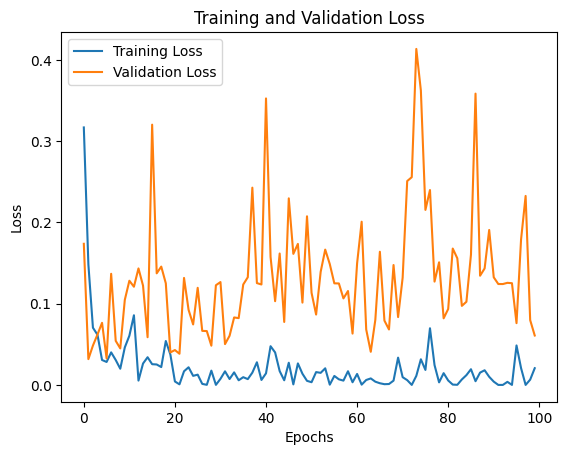

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()